In [1]:
import numpy as np
from keras.utils import to_categorical
from keras.datasets import cifar10

Using TensorFlow backend.
C:\Users\uSer\AnacondaMy\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\uSer\AnacondaMy\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\uSer\AnacondaMy\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\uSer\AnacondaMy\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
NUM_CLASSES = 10
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [4]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

In [5]:
# by using Sequential
model = Sequential([
Dense(200, activation = 'relu', input_shape=(32, 32, 3)),
Flatten(),
Dense(150, activation = 'relu'),
Dense(10, activation = 'softmax'),
])

In [6]:
from keras.layers import Input, Flatten, Dense
from keras.models import Model

In [7]:
# by using functional API
input_layer = Input(shape=(32,32, 3))
x = Flatten()(input_layer)
x = Dense(units=200, activation = 'relu')(x)
x = Dense(units=150, activation = 'relu')(x)
output_layer = Dense(units=10, activation = 'softmax')(x)
model = Model(input_layer, output_layer)

In [8]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 200)               614600    
_________________________________________________________________
dense_5 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1510      
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


In [9]:
from keras.optimizers import Adam
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [10]:
model.fit(x_train
, y_train
, batch_size = 32
, epochs = 10
, shuffle = True
)


Epoch 1/10
50000/50000 [==============================] - 37s 736us/step - loss: 1.8429 - accuracy: 0.3363
Epoch 2/10
50000/50000 [==============================] - 31s 615us/step - loss: 1.6634 - accuracy: 0.4033
Epoch 3/10
50000/50000 [==============================] - 31s 626us/step - loss: 1.5774 - accuracy: 0.4377
Epoch 4/10
50000/50000 [==============================] - 32s 632us/step - loss: 1.5251 - accuracy: 0.4589
Epoch 5/10
50000/50000 [==============================] - 31s 620us/step - loss: 1.4857 - accuracy: 0.4720
Epoch 6/10
50000/50000 [==============================] - 33s 660us/step - loss: 1.4511 - accuracy: 0.4827
Epoch 7/10
50000/50000 [==============================] - 32s 632us/step - loss: 1.4259 - accuracy: 0.4919
Epoch 8/10
50000/50000 [==============================] - 31s 615us/step - loss: 1.3999 - accuracy: 0.5001
Epoch 9/10
50000/50000 [==============================] - 30s 608us/step - loss: 1.3816 - accuracy: 0.5080s - loss: 1.3809 - accuracy: 0.50
Epo

In [17]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 73us/step


[1.445610394859314, 0.4884999990463257]

In [18]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog',
'frog', 'horse', 'ship', 'truck'])

In [19]:
preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

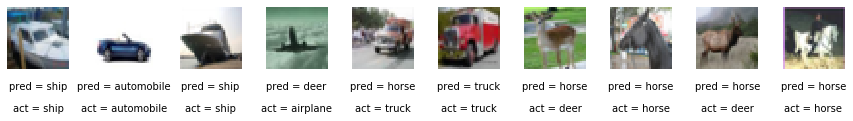

In [44]:
import matplotlib.pyplot as plt
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)


Upgrate model by adding conv layers, BatchNormalization and Dropout

In [45]:

from keras.layers import Conv2D, BatchNormalization, Dropout, LeakyReLU, Activation
input_layer = Input((32,32,3))
x = Conv2D(filters = 32, kernel_size = 3
, strides = 1, padding = 'same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x) # 1

x = Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x) # 2

x = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x) # 3

x = Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x) # 4

x = Flatten()(x) 
x = Dense(128)(x) # layer of perceptrons

x = BatchNormalization()(x) # пакетная нормализация чтобы веса не взлетели

x = LeakyReLU()(x) # в качестве активации

x = Dropout(rate = 0.5)(x) # как я понял слой прореживания

x = Dense(NUM_CLASSES)(x)

output_layer = Activation('softmax')(x) # в качестве активации на последнем слое

model = Model(input_layer, output_layer)

In [46]:
model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_12 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_13 (Batc (None, 16, 16, 32)        128       
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 16, 16, 32)        0   

In [47]:
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [51]:
model.fit(x_train
, y_train
, batch_size = 100
, epochs = 10
, shuffle = True
)

Epoch 1/10
50000/50000 [==============================] - 180s 4ms/step - loss: 1.4197 - accuracy: 0.4920
Epoch 2/10
50000/50000 [==============================] - 183s 4ms/step - loss: 1.1420 - accuracy: 0.5954
Epoch 3/10
50000/50000 [==============================] - 185s 4ms/step - loss: 0.9950 - accuracy: 0.6509
Epoch 4/10
50000/50000 [==============================] - 188s 4ms/step - loss: 0.9046 - accuracy: 0.6801
Epoch 5/10
50000/50000 [==============================] - 194s 4ms/step - loss: 0.8430 - accuracy: 0.7059
Epoch 6/10
50000/50000 [==============================] - 193s 4ms/step - loss: 0.7875 - accuracy: 0.7228
Epoch 7/10
50000/50000 [==============================] - 187s 4ms/step - loss: 0.7430 - accuracy: 0.7398
Epoch 8/10
50000/50000 [==============================] - 177s 4ms/step - loss: 0.7048 - accuracy: 0.7523
Epoch 9/10
50000/50000 [==============================] - 174s 3ms/step - loss: 0.6634 - accuracy: 0.7667
Epoch 10/10
50000/50000 [=====================

In [52]:
model.evaluate(x_test, y_test, batch_size = 1000)

10000/10000 [==============================] - 11s 1ms/step


[0.8395000576972962, 0.713699996471405]

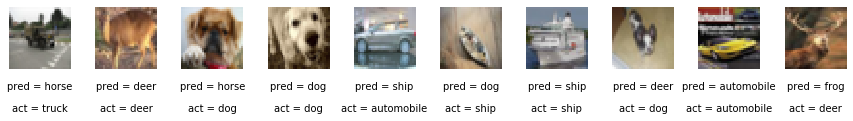

In [54]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)

In [55]:
model.fit(x_train
, y_train
, batch_size = 100
, epochs = 3
, shuffle = True
)

Epoch 1/3
50000/50000 [==============================] - 186s 4ms/step - loss: 0.6081 - accuracy: 0.7871
Epoch 2/3
50000/50000 [==============================] - 180s 4ms/step - loss: 0.5744 - accuracy: 0.7976
Epoch 3/3
50000/50000 [==============================] - 180s 4ms/step - loss: 0.5506 - accuracy: 0.8057


In [56]:
model.evaluate(x_test, y_test, batch_size = 1000)

10000/10000 [==============================] - 9s 914us/step


[0.8287146925926209, 0.7263000011444092]

In [57]:
import pickle as pic

In [63]:
file = open("Serialised_cifar10_recogniser.pkl","wb")
pic.dump(model,file)
file.close()

In [ ]:
# беру сериализованную обученную(new) и не обученную(old) модели
import pickle as pic

f1 = open('newNet.pkl','rb')
f2 = open('oldNet.pkl','rb')
new_model = pic.load(f1)
old_model = pic.load(f2)
f1.close()
f2.close()